In [1]:
import numpy as np
from sklearn.datasets import load_boston
boston = load_boston()
import pandas as pd
X=pd.DataFrame(boston.data[:100,:], columns=boston.feature_names)
y=boston.target[:100]
# limit 100 data

In [2]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,100.000000,100.000000,100.000000,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000
mean,0.283301,12.385000,6.668700,0.0,0.471321,6.234410,56.252000,5.177271,3.960000,289.490000,18.69000,385.301500,10.772900
std,0.389102,22.966802,3.162352,0.0,0.046836,0.490838,27.476787,1.412076,1.392041,45.922089,1.69893,27.386937,5.700031
min,0.006320,0.000000,0.740000,0.0,0.398000,5.399000,2.900000,3.092100,1.000000,216.000000,15.10000,232.600000,1.980000
25%,0.050395,0.000000,4.490000,0.0,0.437000,5.926250,35.225000,4.042225,3.000000,252.000000,17.90000,386.740000,6.702500
50%,0.102405,0.000000,6.910000,0.0,0.453000,6.130500,57.300000,4.990600,4.000000,284.000000,18.70000,394.395000,9.465000
75%,0.221050,18.750000,8.140000,0.0,0.524000,6.433000,81.775000,6.067175,4.250000,307.000000,19.70000,396.900000,13.315000
max,1.612820,100.000000,15.040000,0.0,0.538000,8.069000,100.000000,9.222900,8.000000,469.000000,21.10000,396.900000,30.810000


In [4]:
x = X['LSTAT'].values

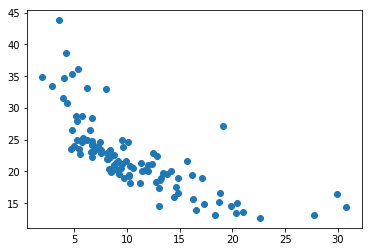

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.scatter(x,y)

In [6]:
from sklearn.linear_model import LinearRegression
lin_1d  = LinearRegression()

In [7]:
lin_1d.fit(x[:,None], y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
x.ndim

1

In [9]:
x[:, np.newaxis].ndim

2

In [10]:
print(lin_1d.predict(2))

[29.09604558]


[]

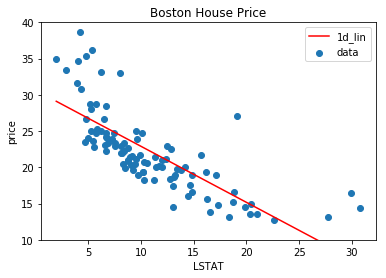

In [11]:
n = np.linspace(np.min(x), np.max(x), 1000)
y_1d_fit = lin_1d.predict(n[:, np.newaxis])

plt.title("Boston House Price")
plt.scatter(x,y,label='data')
plt.plot(n, y_1d_fit, 'r', label='1d_lin')
plt.ylim(10, 40)
plt.xlabel("LSTAT")
plt.ylabel("price")
plt.legend()
plt.plot()

In [12]:
from sklearn.preprocessing import PolynomialFeatures
degree_2 = PolynomialFeatures(degree=2)

In [13]:
degree_2

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [14]:
x_2 = degree_2.fit_transform(x[:,None])

In [15]:
x_2
lin_2d = LinearRegression()
lin_2d.fit(x_2, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

[]

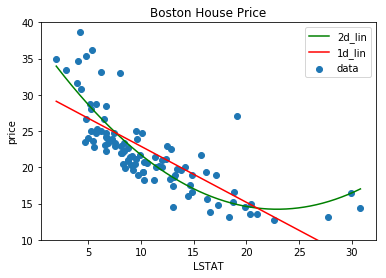

In [16]:
n = np.linspace(np.min(x), np.max(x), 1000)
y_2d_fit=lin_2d.predict(degree_2.fit_transform(n[:, np.newaxis]))
y_1d_fit=lin_1d.predict(n[:,np.newaxis]) 

plt.title("Boston House Price")
plt.scatter(x,y,label='data')
plt.plot(n, y_2d_fit, 'g', label='2d_lin')
plt.plot(n, y_1d_fit, 'r', label='1d_lin')
plt.ylim(10, 40)
plt.xlabel("LSTAT")
plt.ylabel("price")
plt.legend()
plt.plot()

In [17]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y, lin_1d.predict(x[:,np.newaxis]))

15.537906007479371

In [18]:
mean_squared_error(y, lin_2d.predict(x_2))

10.920226905348915

## 課題１

まず今回テキストではLSTATのデータ100個に対し、1次、2次関数をフィッティングしました。もしさらに高次の３次関数、4次関数をフィッティングするとどうなるのでしょうか。
テキストで学んだscikit learnを使った手法で、3次、4次関数についても、同じように係数を求め、結果をデータ点、1次関数、2次関数、3次関数、4次関数をまとめてプロットしてみましょう。また学習後の2乗和誤差を3次関数、4次関数についても求め、2乗和誤差が最も小さい関数はどれになるか調べてください。（プロットを見やすくするためデータ点はテキストの通り100個で行ってください。）

### 回答：
ソースコードとプロット図とそれぞれの関数の二乗誤差は下記にあり、
最も小さいのは**４次関数**になる。

15.537906007479371
10.920226905348915
10.05522570974638
9.617390715416688


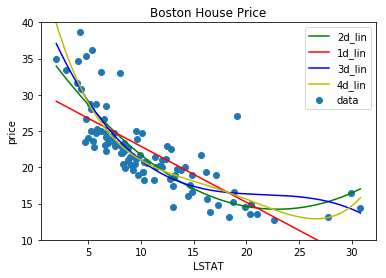

In [19]:
degree_3 = PolynomialFeatures(degree=3)
degree_4 = PolynomialFeatures(degree=4)

x_3 = degree_3.fit_transform(x[:,None])
x_4 = degree_4.fit_transform(x[:,None])

lin_3d = LinearRegression()
lin_4d = LinearRegression()

lin_3d.fit(x_3, y)
lin_4d.fit(x_4, y)

n = np.linspace(np.min(x), np.max(x), 1000)

y_3d_fit=lin_3d.predict(degree_3.fit_transform(n[:, np.newaxis]))
y_4d_fit=lin_4d.predict(degree_4.fit_transform(n[:, np.newaxis]))

plt.title("Boston House Price")
plt.scatter(x,y,label='data')
plt.plot(n, y_2d_fit, 'g', label='2d_lin')
plt.plot(n, y_1d_fit, 'r', label='1d_lin')
plt.plot(n, y_3d_fit, 'b', label='3d_lin')
plt.plot(n, y_4d_fit, 'y', label='4d_lin')
plt.ylim(10, 40)
plt.xlabel("LSTAT")
plt.ylabel("price")
plt.legend()
plt.plot()

print(mean_squared_error(y, lin_1d.predict(x[:,np.newaxis])))
print(mean_squared_error(y, lin_2d.predict(x_2)))
print(mean_squared_error(y, lin_3d.predict(x_3)))
print(mean_squared_error(y, lin_4d.predict(x_4)))

## 課題2

もう少し回帰の練習をつむため、今度は同じボストンの住宅価格のデータセットにおいて特徴量としてLSTATではなくAGEを使ってみましょう。

```x=X['AGE'].values```

とすればデータを読み込むことができます。

このデータについてもテキストで学んだscikit learnを使った手法で１次から4次関数についてまで、同じように係数を求め、結果をデータ点、1次関数、2次関数、3次関数、4次関数をまとめてプロットしてみましょう。また学習後の2乗和誤差をそれぞれについても求め、2乗和誤差が最も小さい関数はどれになるか調べてください。


1次関数の２乗誤差は
26.754508704139507
2次関数の２乗誤差は
24.39708813651596
3次関数の２乗誤差は
23.97824219967744
4次関数の２乗誤差は
23.956816976819297


[]

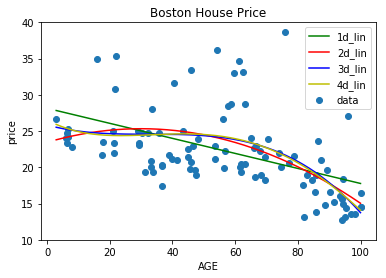

In [23]:
# モジュールインポート以外をもう一度最初からやってみる
boston  = load_boston()
X = pd.DataFrame(boston.data[:100,:], columns=boston.feature_names)
y=boston.target[:100]
#データを100個に限っているのは後でグラフをプロットしたときの様子を見やすくするため
x = X['AGE'].values

y_pred = [] 

for i in [1, 2, 3, 4]:
    # 線形回帰モデルを使う
    lin_ = LinearRegression()
    if i == 1:
        x_ = x[:, np.newaxis]
    else:
        degree_ = PolynomialFeatures(degree=i)
        x_ = degree_.fit_transform(x[:, None])
    
    lin_.fit(x_, y)
    n = np.linspace(np.min(x), np.max(x), 1000)

    if i ==1:
        y_pred.append(lin_.predict(n[:, np.newaxis]))
        print('1次関数の２乗誤差は')
        print(mean_squared_error(y, lin_.predict(x_)))
    else:
        y_pred.append(lin_.predict(degree_.fit_transform(n[:, np.newaxis])))
        print('{}次関数の２乗誤差は'.format(i))
        print(mean_squared_error(y, lin_.predict(x_)))
    

plt.title("Boston House Price")
plt.scatter(x,y,label='data')
plt.plot(n, y_pred[0], 'g', label='1d_lin')
plt.plot(n, y_pred[1], 'r',  label='2d_lin')
plt.plot(n, y_pred[2], 'b', label='3d_lin')
plt.plot(n, y_pred[3], 'y', label='4d_lin')
plt.ylim(10, 40)
plt.xlabel("AGE")
plt.ylabel("price")
plt.legend()
plt.plot()

### 回答
上記ソースコードでプロットしており、２乗誤差が最小なのは４次関数となる。